In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd 
import string

import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Input
from sklearn.model_selection import train_test_split
import re

## Import Data

In [2]:
train_set = pd.read_pickle("ProccessedData/Preproccessed_data_train.pkl")
test_set = pd.read_pickle("ProccessedData/Preproccessed_data_test.pkl")

In [3]:
train_set.head(5)

Customer Voice Sentiment Label
0  makan sini guna voucher disdus paket nasi ayam...        negative
1  mas indosat buat main game enemy has been slai...        negative
2  trus sy percuma dong update no hp baru cs cab ...        negative
3       kita pilih maka ada lebih kampung akan gusur        negative
4  karena adik suka restoran akhir mampir sini aw...        negative

In [4]:
test_set.head(5)

Customer Voice Sentiment Label
0  tempat sih tarik mudah jangkau segala arah men...        negative
1  lokasi strategis penasaran daerah situ rame tr...        negative
2  sesuai nama restoran unik saji makan pakai pir...        negative
3  datang petang hujan deras tempat parkir cukup ...        negative
4  kalao mau sana jangan pas malem sih soal bakal...        negative

## Tokenize, transform to sequence and add padding

In [5]:
max_fatures = 5340
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(train_set['Customer Voice'])
X = tokenizer.texts_to_sequences(train_set['Customer Voice'])
X = pad_sequences(X, maxlen = 65) 
Y = train_set['Sentiment Label'].factorize()

In [6]:
Y = Y[0].reshape((Y[0].shape[0], 1))

## Model

In [7]:
embed_dim = 16
lstm_out = 8

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out))
model.add(Dense(4))
model.add(Dropout(0.65))
model.add(Dense(1,activation='tanh'))
model.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0004), metrics = ['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 65, 16)            85440     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 86,281
Trainable params: 86,281
Non-trainable params: 0
_________________________________________________________________
None


## Train

In [8]:
history = model.fit(X, Y, epochs = 50, validation_split=0.2, verbose = 2)

Train on 1424 samples, validate on 356 samples
Epoch 1/50
1424/1424 - 5s - loss: 2.3121 - acc: 0.4073 - val_loss: 1.9860 - val_acc: 0.0000e+00
Epoch 2/50
1424/1424 - 2s - loss: 1.3541 - acc: 0.4122 - val_loss: 1.3715 - val_acc: 0.0000e+00
Epoch 3/50
1424/1424 - 2s - loss: 1.1670 - acc: 0.4691 - val_loss: 0.7581 - val_acc: 0.3230
Epoch 4/50
1424/1424 - 2s - loss: 1.0878 - acc: 0.5379 - val_loss: 0.6705 - val_acc: 0.5927
Epoch 5/50
1424/1424 - 2s - loss: 0.9802 - acc: 0.5541 - val_loss: 0.7457 - val_acc: 0.3848
Epoch 6/50
1424/1424 - 2s - loss: 0.9742 - acc: 0.5751 - val_loss: 0.6728 - val_acc: 0.5871
Epoch 7/50
1424/1424 - 2s - loss: 0.8830 - acc: 0.6152 - val_loss: 0.6099 - val_acc: 0.7247
Epoch 8/50
1424/1424 - 2s - loss: 0.8624 - acc: 0.6440 - val_loss: 0.5824 - val_acc: 0.7669
Epoch 9/50
1424/1424 - 2s - loss: 0.7620 - acc: 0.6952 - val_loss: 0.4474 - val_acc: 0.8933
Epoch 10/50
1424/1424 - 2s - loss: 0.6923 - acc: 0.7472 - val_loss: 0.4623 - val_acc: 0.8567
Epoch 11/50
1424/1424 - 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


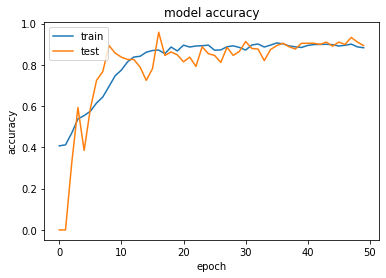

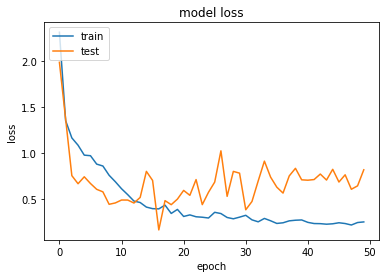

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### save model

In [10]:
# save model to single file
model.save('saved_model/lstm_model.h5')

### load model and predict

In [11]:
from tensorflow.keras.models import load_model
# load model from single file
model = load_model('saved_model/lstm_model.h5')
# make predictions
score,acc = model.evaluate(X, Y, verbose = 2)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

1780/1 - 1s - loss: 0.4765 - acc: 0.9787
score: 0.17
acc: 0.98


In [12]:
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(train_set['Customer Voice'])
X = tokenizer.texts_to_sequences(test_set['Customer Voice'])
X = pad_sequences(X, maxlen=65)

In [13]:
Y = test_set['Sentiment Label'].factorize()
Y = Y[0].reshape((Y[0].shape[0], 1))

In [14]:
Y_pred = model.predict_classes(X)
pd.DataFrame(np.concatenate([Y, Y_pred], axis = 1).T)

0    1    2    3    4    5    6    7    8    9    ...  175  176  177  178  \
0    0    0    0    0    0    0    0    0    0    0  ...    1    1    1    1   
1    1    0    0    0    1    0    1    1    1    0  ...    1    0    1    1   

   179  180  181  182  183  184  
0    1    1    1    1    1    1  
1    1    1    1    1    1    0  

[2 rows x 185 columns]

In [15]:
from sklearn.metrics import accuracy_score

print("Tesing Accuracy: ", accuracy_score(Y, Y_pred)*100,"%")


Tesing Accuracy:  74.05405405405405 %


## Predict new data

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re 
import string

def preproccess(df):
    # Lowering all words
    df = df.apply(lambda x: x.lower())
    # remove all numbers
    df = df.apply(lambda x: re.sub(r"\d+", "", x))
    # remove all punctuations
    df = df.apply(lambda x: x.translate(str.maketrans("","",string.punctuation)))
    # remove whitespaces
    df = df.apply(lambda x: x.strip())
    
    #stop word removal
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    df = df.apply(lambda x: stopword.remove(x))
    
    # Stemming, this may take a while
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    df = df.apply(lambda x: stemmer.stem(x))

    return df

In [17]:
sentence = "Lokasinya memang sedikit tersembunyi di sudut sebuah perumahan, di luar jangkauan bus atau angkot. Hanya bisa dijangkau dengan kendaraan pribadi. Konsep tempatnya bagus, seperti rumah di pedesaan Eropa dengan lantai dan dinding kayu, taman di pekarangan berpagar kayu, berpadu dengan hawa sejuk Bandung. Selain di dalam, pengunjung bisa menikmati makanannya di kursi-kursi di area taman yang unik menggunakan drum bekas."

from tensorflow.keras.models import load_model
# load model from single file
model = load_model('saved_model/lstm_model.h5')

df = pd.DataFrame([sentence])
cleaned = preproccess(df[0])
tokenizer = Tokenizer(num_words=5340, split=' ')
tokenizer.fit_on_texts(train_set['Customer Voice'])

X1 = tokenizer.texts_to_sequences(cleaned)
X = pad_sequences(X1, maxlen=65) 

pred = model.predict_classes(X)[0]
data = {'Sentence': sentence,
                    'Cleaned Sentence': cleaned,
                    'Label': str(pred[0])}

data

{'Sentence': 'Lokasinya memang sedikit tersembunyi di sudut sebuah perumahan, di luar jangkauan bus atau angkot. Hanya bisa dijangkau dengan kendaraan pribadi. Konsep tempatnya bagus, seperti rumah di pedesaan Eropa dengan lantai dan dinding kayu, taman di pekarangan berpagar kayu, berpadu dengan hawa sejuk Bandung. Selain di dalam, pengunjung bisa menikmati makanannya di kursi-kursi di area taman yang unik menggunakan drum bekas.',
 'Cleaned Sentence': 0    lokasi memang sedikit sembunyi sudut buah ruma...
 Name: 0, dtype: object,
 'Label': '1'}